In [1]:
!pip install pandas scikit-learn


In [2]:
!pip install matplotlib 

In [3]:
!pip install seaborn

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder


In [42]:
data = pd.read_csv('flights.csv')
data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


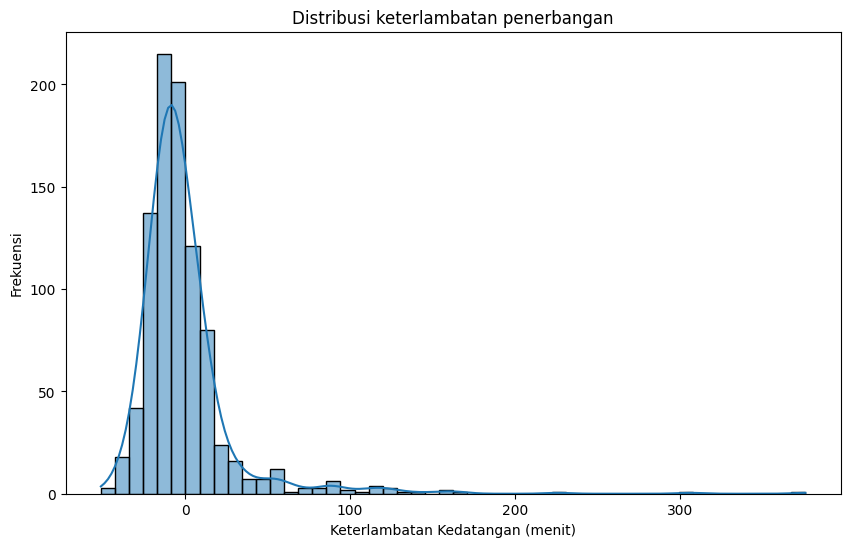

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(data['ARRIVAL_DELAY'].dropna(), bins=50, kde=True)
plt.title('Distribusi keterlambatan penerbangan')
plt.xlabel('Keterlambatan Kedatangan (menit)')
plt.ylabel('Frekuensi')
plt.show()

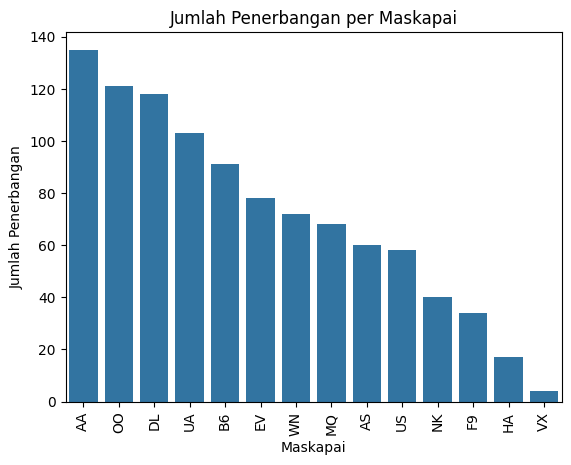

In [44]:
sns.countplot(data=data, x='AIRLINE', order=data['AIRLINE'].value_counts().index)
plt.title('Jumlah Penerbangan per Maskapai')
plt.xlabel('Maskapai')
plt.ylabel('Jumlah Penerbangan')
plt.xticks(rotation=90)
plt.show()

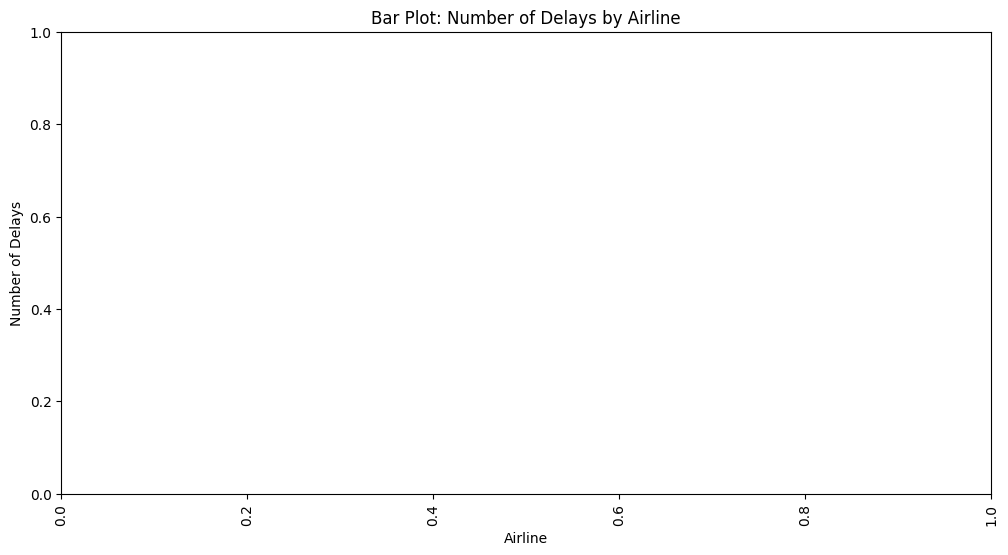

In [45]:
delay_counts = data[data['WEATHER_DELAY'] == 1]['AIRLINE'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=delay_counts.index, y=delay_counts.values, palette='viridis')
plt.title('Bar Plot: Number of Delays by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Delays')
plt.xticks(rotation=90)
plt.show()


In [46]:
numeric_features = ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 
                    'SCHEDULED_DEPARTURE', 'DISTANCE', 'SCHEDULED_ARRIVAL']
categorical_features = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']

In [47]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [48]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [49]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [50]:
data['AIRLINE'] = data['AIRLINE'].astype(str)
data['ORIGIN_AIRPORT'] = data['ORIGIN_AIRPORT'].astype(str)
data['DESTINATION_AIRPORT'] = data['DESTINATION_AIRPORT'].astype(str)

In [51]:
data['DELAYED'] = data['ARRIVAL_DELAY'].apply(lambda x: 1 if x > 0 else 0)
features = ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
            'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 
            'DISTANCE', 'SCHEDULED_ARRIVAL']
target = 'DELAYED'

X = data[features]
y = data[target]


In [52]:
x = data.drop(columns='ARRIVAL_DELAY', axis=1)
y = data['DELAYED'] = data['ARRIVAL_DELAY'].apply(lambda x: 1 if x > 0 else 0)

In [53]:
labelencoder_airline = LabelEncoder()
X['AIRLINE'] = labelencoder_airline.fit_transform(X['AIRLINE'])

C:\Users\Asus\AppData\Local\Temp\ipykernel_1484\2702602731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['AIRLINE'] = labelencoder_airline.fit_transform(X['AIRLINE'])


In [54]:
labelencoder_origin_airport = LabelEncoder()
X['ORIGIN_AIRPORT'] = labelencoder_origin_airport.fit_transform(X['ORIGIN_AIRPORT'])

C:\Users\Asus\AppData\Local\Temp\ipykernel_1484\4005352082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ORIGIN_AIRPORT'] = labelencoder_origin_airport.fit_transform(X['ORIGIN_AIRPORT'])


In [55]:
labelencoder_destination_airport = LabelEncoder()
X['DESTINATION_AIRPORT'] = labelencoder_destination_airport.fit_transform(X['DESTINATION_AIRPORT'])

C:\Users\Asus\AppData\Local\Temp\ipykernel_1484\1669386463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['DESTINATION_AIRPORT'] = labelencoder_destination_airport.fit_transform(X['DESTINATION_AIRPORT'])


In [56]:
print(x)

     YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0    2015      1    1            4      AS             98      N407AS   
1    2015      1    1            4      AA           2336      N3KUAA   
2    2015      1    1            4      US            840      N171US   
3    2015      1    1            4      AA            258      N3HYAA   
4    2015      1    1            4      AS            135      N527AS   
..    ...    ...  ...          ...     ...            ...         ...   
994  2015      1    1            4      WN            893      N737JW   
995  2015      1    1            4      WN            552      N291WN   
996  2015      1    1            4      WN           3239      N905WN   
997  2015      1    1            4      WN           1912      N554WN   
998  2015      1    1            4      UA           1660      N17730   

    ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
0              ANC                 SEA                 

In [57]:
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
994    1
995    1
996    0
997    0
998    0
Name: ARRIVAL_DELAY, Length: 999, dtype: int64


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
model = LogisticRegression(max_iter=1000)

In [60]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [61]:
y_pred = model.predict(X_test)

In [62]:
accuracy = accuracy_score(y_test, y_pred)

In [63]:
print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.665


In [64]:
print(f'Akurasi model: {accuracy:.2f}')

Akurasi model: 0.67


In [65]:
pickle.dump(model, open('prediksi_delayFlight.sav', 'wb'))
pickle.dump(labelencoder_airline, open('labelencoder_airline.sav', 'wb'))
pickle.dump(labelencoder_origin_airport, open('labelencoder_origin_airport.sav', 'wb'))
pickle.dump(labelencoder_destination_airport, open('labelencoder_destination_airport.sav', 'wb'))

In [67]:
model = pickle.load(open('prediksi_delayFlight.sav', 'rb'))
labelencoder_airline = pickle.load(open('labelencoder_airline.sav', 'rb'))
labelencoder_origin_airport = pickle.load(open('labelencoder_origin_airport.sav', 'rb'))
labelencoder_destination_airport = pickle.load(open('labelencoder_destination_airport.sav', 'rb'))

In [68]:
input_data = {
    "year": 2024,
    "month": 7,
    "day": 15,
    "day_of_week": 2,
    "airline": "AA",
    "flight_number": 1234,
    "origin_airport": "JFK",
    "destination_airport": "LAX",
    "scheduled_departure": 1000,
    "distance": 300,
    "scheduled_arrival": 1500
}

In [69]:
airline_encoded = labelencoder_airline.transform([input_data["airline"]])[0]
origin_airport_encoded = labelencoder_origin_airport.transform([input_data["origin_airport"]])[0]
destination_airport_encoded = labelencoder_destination_airport.transform([input_data["destination_airport"]])[0]

In [70]:

inputs = [input_data["year"], input_data["month"], input_data["day"], input_data["day_of_week"], 
          airline_encoded, input_data["flight_number"], origin_airport_encoded, 
          destination_airport_encoded, input_data["scheduled_departure"], input_data["distance"], 
          input_data["scheduled_arrival"]]


input_data_as_numpy_array = np.asarray(inputs)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)


if prediction[0] == 1:
    print('Penerbangan Terlambat')
else:
    print('Penerbangan Tidak Terlambat')

Penerbangan Tidak Terlambat


c:\Users\Asus\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [71]:
import pickle

In [72]:
filename = 'prediksi_delayFlight.sav'
pickle.dump(model, open(filename, 'wb'))